In [1]:
# import sys
# !{sys.executable} -m pip install raster2xyz
from osgeo import gdal
import fiona
import os
import urllib.request
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import rasterio as rio
import xarray as xr
import os
import numpy as np
from rasterio.warp import transform
from os.path import join
from glob import glob
from tqdm import tqdm
import rioxarray as rxr
import rasterio.mask
import rasterstats as rst
import pandas as pd
from PIL import Image
import tifftools
import pyproj
import raster2xyz
import io
import sys
from raster2xyz.raster2xyz import Raster2xyz
import warnings
warnings.filterwarnings('ignore')
#Supress default INFO logging

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [2]:
def transmogrifyer(dem):
    dem_reader = xr.open_rasterio(dem)
    ny, nx = len(dem_reader['y']), len(dem_reader['x'])
    x, y = np.meshgrid(dem_reader['x'], dem_reader['y'])
    lon, lat = transform(dem_reader.crs, {'init': 'EPSG:4326'},
                     x.flatten(), y.flatten())
    
    dem_lon = np.asarray(lon).reshape((ny, nx))
    dem_lat = np.asarray(lat).reshape((ny, nx))
    dem_reader.coords['lon'] = (('y', 'x'), dem_lon)
    dem_reader.coords['lat'] = (('y', 'x'), dem_lat)
    dem_greyscale = dem_reader.mean(dim="band")
    
    ax = plt.subplot(projection=ccrs.PlateCarree())
    dem_plot = dem_greyscale.plot(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(),
                                  cmap='Greys_r', add_colorbar=False, shading=None)
    

def mask_shaper(mask_data):
    X = mask_data['x'].values.reshape(ny,nx).T
    Y = mask_data['y'].values.reshape(ny,nx).T
    Z = mask_data['z'].values.reshape(ny,nx).T

    plt.pcolormesh(X,Y,Z)
    plt.show()

In [3]:
from raster2xyz.raster2xyz import Raster2xyz
import warnings
warnings.filterwarnings('ignore')
#Supress default INFO logging

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

dir_dem = "/home/sa42/data/glac/RGI_TOPO/extracted_dem_files/MAPZEN/"
dir_mask = "/home/sa42/data/glac/RGI_TOPO/extracted_mask_files/"
full_dem_path = join(dir_dem,"*.tif")

for file in tqdm(glob(full_dem_path)):
    file_left = file[57:]
    RGI_file = file_left[:14]
    
    dem_file = RGI_file + "_dem.tif"
    dem = join(dir_dem, dem_file)
    
    mask_file = RGI_file + "_glacier_mask.tif"
    mask = join(dir_mask, mask_file)
    
    
    print(mask)
    print(dem)
    dem_reader = xr.open_rasterio(dem)
    ny, nx = len(dem_reader['y']), len(dem_reader['x'])
    x, y = np.meshgrid(dem_reader['x'], dem_reader['y'])
    lon, lat = transform(dem_reader.crs, {'init': 'EPSG:4326'},
                     x.flatten(), y.flatten())
    
    dem_lon = np.asarray(lon).reshape((ny, nx))
    dem_lat = np.asarray(lat).reshape((ny, nx))
    dem_reader.coords['lon'] = (('y', 'x'), dem_lon)
    dem_reader.coords['lat'] = (('y', 'x'), dem_lat)
    dem_greyscale = dem_reader.mean(dim="band")
    

    dir_out_mask = "/home/sa42/data/glac/RGI_TOPO/testy_testy/"
    mask_out = join(dir_out_mask, RGI_file + ".csv")
    print(mask_out)

    input_raster = mask

    rtxyz = Raster2xyz()
    rtxyz.translate(input_raster, mask_out)
    mask_data = pd.read_csv(mask_out)
    
    break
mask_data

  0%|          | 0/216500 [00:00<?, ?it/s][2022-01-07 03:59:44 - INFO] - Getting geotransform and data...
[2022-01-07 03:59:44 - INFO] - Getting XYZ data...
[2022-01-07 03:59:44 - INFO] - Getting geotransformed coordinates...
[2022-01-07 03:59:44 - INFO] - Building XYZ data...
[2022-01-07 03:59:44 - INFO] - New XYZ (csv file) created...


/home/sa42/data/glac/RGI_TOPO/extracted_mask_files/RGI60-19.02001_glacier_mask.tif
/home/sa42/data/glac/RGI_TOPO/extracted_dem_files/MAPZEN/RGI60-19.02001_dem.tif
/home/sa42/data/glac/RGI_TOPO/testy_testy/RGI60-19.02001.csv


  0%|          | 0/216500 [00:00<?, ?it/s]


,x,y,z
0,-3359.581871,-6.918970e+06,0
1,-3286.581871,-6.918970e+06,0
2,-3213.581871,-6.918970e+06,0
3,-3140.581871,-6.918970e+06,0
4,-3067.581871,-6.918970e+06,0
...,...,...,...
9893,3648.418129,-6.926051e+06,0
9894,3721.418129,-6.926051e+06,0
9895,3794.418129,-6.926051e+06,0
9896,3867.418129,-6.926051e+06,0


In [38]:

dem_reader = xr.open_rasterio(dem)
ny, nx = len(dem_reader['y']), len(dem_reader['x'])
x, y = np.meshgrid(dem_reader['x'], dem_reader['y'])
lon, lat = transform(dem_reader.crs, {'init': 'EPSG:4326'},
                 x.flatten(), y.flatten())
    
dem_lon = np.asarray(lon).reshape((ny, nx))
dem_lat = np.asarray(lat).reshape((ny, nx))
dem_reader.coords['lon'] = (('y', 'x'), dem_lon)
dem_reader.coords['lat'] = (('y', 'x'), dem_lat)

    
dem_reader.coords['lat'].to_pandas().to_csv("/home/sa42/data/glac/RGI_TOPO/testy_testy/" + RGI_file + "lat.csv")
dem_reader.coords['lon'].to_pandas().to_csv("/home/sa42/data/glac/RGI_TOPO/testy_testy/" + RGI_file + "lon.csv")

pp_lon = pd.read_csv("/home/sa42/data/glac/RGI_TOPO/testy_testy/" + RGI_file + "lon.csv")
pp_lon
pp_lat = pd.read_csv("/home/sa42/data/glac/RGI_TOPO/testy_testy/" + RGI_file + "lat.csv")
pp_lat
pp = pd.merge(pp_lat, pp_lon, how="inner", on = "y")
pp.replace("_x","_lat")

,y,-3359.5818707992235_x,-3286.5818707992235_x,-3213.5818707992235_x,-3140.5818707992235_x,-3067.5818707992235_x,-2994.5818707992235_x,-2921.5818707992235_x,-2848.5818707992235_x,-2775.5818707992235_x,...,3283.4181292007765_y,3356.4181292007765_y,3429.4181292007765_y,3502.4181292007765_y,3575.4181292007765_y,3648.4181292007765_y,3721.4181292007765_y,3794.4181292007765_y,3867.4181292007765_y,3940.4181292007765_y
0,-6.918970e+06,-62.402028,-62.402029,-62.402030,-62.402030,-62.402031,-62.402032,-62.402032,-62.402033,-62.402033,...,-59.388774,-59.387361,-59.385949,-59.384536,-59.383124,-59.381712,-59.380299,-59.378887,-59.377474,-59.376062
1,-6.919043e+06,-62.402684,-62.402684,-62.402685,-62.402686,-62.402686,-62.402687,-62.402687,-62.402688,-62.402688,...,-59.388772,-59.387360,-59.385947,-59.384535,-59.383122,-59.381710,-59.380298,-59.378885,-59.377473,-59.376060
2,-6.919116e+06,-62.403339,-62.403340,-62.403340,-62.403341,-62.403341,-62.403342,-62.403343,-62.403343,-62.403344,...,-59.388771,-59.387358,-59.385946,-59.384533,-59.383121,-59.381709,-59.380296,-59.378884,-59.377471,-59.376059
3,-6.919189e+06,-62.403994,-62.403995,-62.403995,-62.403996,-62.403997,-62.403997,-62.403998,-62.403998,-62.403999,...,-59.388769,-59.387357,-59.385944,-59.384532,-59.383119,-59.381707,-59.380295,-59.378882,-59.377470,-59.376057
4,-6.919262e+06,-62.404649,-62.404650,-62.404651,-62.404651,-62.404652,-62.404653,-62.404653,-62.404654,-62.404654,...,-59.388768,-59.387355,-59.385943,-59.384530,-59.383118,-59.381705,-59.380293,-59.378880,-59.377468,-59.376055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,-6.925759e+06,-62.462967,-62.462967,-62.462968,-62.462968,-62.462969,-62.462970,-62.462970,-62.462971,-62.462971,...,-59.388644,-59.387229,-59.385814,-59.384398,-59.382983,-59.381568,-59.380153,-59.378737,-59.377322,-59.375907
94,-6.925832e+06,-62.463622,-62.463622,-62.463623,-62.463624,-62.463624,-62.463625,-62.463626,-62.463626,-62.463627,...,-59.388643,-59.387227,-59.385812,-59.384397,-59.382982,-59.381566,-59.380151,-59.378736,-59.377320,-59.375905
95,-6.925905e+06,-62.464277,-62.464278,-62.464278,-62.464279,-62.464280,-62.464280,-62.464281,-62.464281,-62.464282,...,-59.388641,-59.387226,-59.385811,-59.384395,-59.382980,-59.381565,-59.380149,-59.378734,-59.377319,-59.375903
96,-6.925978e+06,-62.464932,-62.464933,-62.464934,-62.464934,-62.464935,-62.464935,-62.464936,-62.464937,-62.464937,...,-59.388640,-59.387225,-59.385809,-59.384394,-59.382979,-59.381563,-59.380148,-59.378733,-59.377317,-59.375902


In [45]:

df = pd.DataFrame(dem_lon)
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-59.517300,-59.515888,-59.514475,-59.513063,-59.511651,-59.510238,-59.508826,-59.507413,-59.506001,-59.504589,...,-59.388774,-59.387361,-59.385949,-59.384536,-59.383124,-59.381712,-59.380299,-59.378887,-59.377474,-59.376062
1,-59.517302,-59.515889,-59.514477,-59.513064,-59.511652,-59.510239,-59.508827,-59.507415,-59.506002,-59.504590,...,-59.388772,-59.387360,-59.385947,-59.384535,-59.383122,-59.381710,-59.380298,-59.378885,-59.377473,-59.376060
2,-59.517303,-59.515890,-59.514478,-59.513066,-59.511653,-59.510241,-59.508828,-59.507416,-59.506003,-59.504591,...,-59.388771,-59.387358,-59.385946,-59.384533,-59.383121,-59.381709,-59.380296,-59.378884,-59.377471,-59.376059
3,-59.517304,-59.515892,-59.514479,-59.513067,-59.511654,-59.510242,-59.508830,-59.507417,-59.506005,-59.504592,...,-59.388769,-59.387357,-59.385944,-59.384532,-59.383119,-59.381707,-59.380295,-59.378882,-59.377470,-59.376057
4,-59.517306,-59.515893,-59.514481,-59.513068,-59.511656,-59.510243,-59.508831,-59.507418,-59.506006,-59.504593,...,-59.388768,-59.387355,-59.385943,-59.384530,-59.383118,-59.381705,-59.380293,-59.378880,-59.377468,-59.376055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,-59.517432,-59.516017,-59.514602,-59.513187,-59.511771,-59.510356,-59.508941,-59.507526,-59.506110,-59.504695,...,-59.388644,-59.387229,-59.385814,-59.384398,-59.382983,-59.381568,-59.380153,-59.378737,-59.377322,-59.375907
94,-59.517434,-59.516019,-59.514603,-59.513188,-59.511773,-59.510357,-59.508942,-59.507527,-59.506112,-59.504696,...,-59.388643,-59.387227,-59.385812,-59.384397,-59.382982,-59.381566,-59.380151,-59.378736,-59.377320,-59.375905
95,-59.517435,-59.516020,-59.514605,-59.513189,-59.511774,-59.510359,-59.508943,-59.507528,-59.506113,-59.504697,...,-59.388641,-59.387226,-59.385811,-59.384395,-59.382980,-59.381565,-59.380149,-59.378734,-59.377319,-59.375903
96,-59.517437,-59.516021,-59.514606,-59.513191,-59.511775,-59.510360,-59.508945,-59.507529,-59.506114,-59.504699,...,-59.388640,-59.387225,-59.385809,-59.384394,-59.382979,-59.381563,-59.380148,-59.378733,-59.377317,-59.375902


In [34]:
# steal each cell and send it to a new "y" column with corresponding "x" from lon
pp_lat

,y,-3359.5818707992235,-3286.5818707992235,-3213.5818707992235,-3140.5818707992235,-3067.5818707992235,-2994.5818707992235,-2921.5818707992235,-2848.5818707992235,-2775.5818707992235,...,3283.4181292007765,3356.4181292007765,3429.4181292007765,3502.4181292007765,3575.4181292007765,3648.4181292007765,3721.4181292007765,3794.4181292007765,3867.4181292007765,3940.4181292007765
0,-6.918970e+06,-62.402028,-62.402029,-62.402030,-62.402030,-62.402031,-62.402032,-62.402032,-62.402033,-62.402033,...,-62.402029,-62.402028,-62.402028,-62.402027,-62.402026,-62.402026,-62.402025,-62.402024,-62.402023,-62.402023
1,-6.919043e+06,-62.402684,-62.402684,-62.402685,-62.402686,-62.402686,-62.402687,-62.402687,-62.402688,-62.402688,...,-62.402684,-62.402684,-62.402683,-62.402682,-62.402682,-62.402681,-62.402680,-62.402679,-62.402679,-62.402678
2,-6.919116e+06,-62.403339,-62.403340,-62.403340,-62.403341,-62.403341,-62.403342,-62.403343,-62.403343,-62.403344,...,-62.403340,-62.403339,-62.403338,-62.403338,-62.403337,-62.403336,-62.403335,-62.403335,-62.403334,-62.403333
3,-6.919189e+06,-62.403994,-62.403995,-62.403995,-62.403996,-62.403997,-62.403997,-62.403998,-62.403998,-62.403999,...,-62.403995,-62.403994,-62.403994,-62.403993,-62.403992,-62.403991,-62.403991,-62.403990,-62.403989,-62.403988
4,-6.919262e+06,-62.404649,-62.404650,-62.404651,-62.404651,-62.404652,-62.404653,-62.404653,-62.404654,-62.404654,...,-62.404650,-62.404649,-62.404649,-62.404648,-62.404647,-62.404647,-62.404646,-62.404645,-62.404644,-62.404644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,-6.925759e+06,-62.462967,-62.462967,-62.462968,-62.462968,-62.462969,-62.462970,-62.462970,-62.462971,-62.462971,...,-62.462967,-62.462967,-62.462966,-62.462965,-62.462965,-62.462964,-62.462963,-62.462962,-62.462962,-62.462961
94,-6.925832e+06,-62.463622,-62.463622,-62.463623,-62.463624,-62.463624,-62.463625,-62.463626,-62.463626,-62.463627,...,-62.463622,-62.463622,-62.463621,-62.463620,-62.463620,-62.463619,-62.463618,-62.463618,-62.463617,-62.463616
95,-6.925905e+06,-62.464277,-62.464278,-62.464278,-62.464279,-62.464280,-62.464280,-62.464281,-62.464281,-62.464282,...,-62.464278,-62.464277,-62.464276,-62.464276,-62.464275,-62.464274,-62.464274,-62.464273,-62.464272,-62.464271
96,-6.925978e+06,-62.464932,-62.464933,-62.464934,-62.464934,-62.464935,-62.464935,-62.464936,-62.464937,-62.464937,...,-62.464933,-62.464932,-62.464932,-62.464931,-62.464930,-62.464930,-62.464929,-62.464928,-62.464927,-62.464927


In [35]:
# steal each cell and send it to a new "x" column with corresponding "y" from lon

pp_lon

,y,-3359.5818707992235,-3286.5818707992235,-3213.5818707992235,-3140.5818707992235,-3067.5818707992235,-2994.5818707992235,-2921.5818707992235,-2848.5818707992235,-2775.5818707992235,...,3283.4181292007765,3356.4181292007765,3429.4181292007765,3502.4181292007765,3575.4181292007765,3648.4181292007765,3721.4181292007765,3794.4181292007765,3867.4181292007765,3940.4181292007765
0,-6.918970e+06,-59.517300,-59.515888,-59.514475,-59.513063,-59.511651,-59.510238,-59.508826,-59.507413,-59.506001,...,-59.388774,-59.387361,-59.385949,-59.384536,-59.383124,-59.381712,-59.380299,-59.378887,-59.377474,-59.376062
1,-6.919043e+06,-59.517302,-59.515889,-59.514477,-59.513064,-59.511652,-59.510239,-59.508827,-59.507415,-59.506002,...,-59.388772,-59.387360,-59.385947,-59.384535,-59.383122,-59.381710,-59.380298,-59.378885,-59.377473,-59.376060
2,-6.919116e+06,-59.517303,-59.515890,-59.514478,-59.513066,-59.511653,-59.510241,-59.508828,-59.507416,-59.506003,...,-59.388771,-59.387358,-59.385946,-59.384533,-59.383121,-59.381709,-59.380296,-59.378884,-59.377471,-59.376059
3,-6.919189e+06,-59.517304,-59.515892,-59.514479,-59.513067,-59.511654,-59.510242,-59.508830,-59.507417,-59.506005,...,-59.388769,-59.387357,-59.385944,-59.384532,-59.383119,-59.381707,-59.380295,-59.378882,-59.377470,-59.376057
4,-6.919262e+06,-59.517306,-59.515893,-59.514481,-59.513068,-59.511656,-59.510243,-59.508831,-59.507418,-59.506006,...,-59.388768,-59.387355,-59.385943,-59.384530,-59.383118,-59.381705,-59.380293,-59.378880,-59.377468,-59.376055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,-6.925759e+06,-59.517432,-59.516017,-59.514602,-59.513187,-59.511771,-59.510356,-59.508941,-59.507526,-59.506110,...,-59.388644,-59.387229,-59.385814,-59.384398,-59.382983,-59.381568,-59.380153,-59.378737,-59.377322,-59.375907
94,-6.925832e+06,-59.517434,-59.516019,-59.514603,-59.513188,-59.511773,-59.510357,-59.508942,-59.507527,-59.506112,...,-59.388643,-59.387227,-59.385812,-59.384397,-59.382982,-59.381566,-59.380151,-59.378736,-59.377320,-59.375905
95,-6.925905e+06,-59.517435,-59.516020,-59.514605,-59.513189,-59.511774,-59.510359,-59.508943,-59.507528,-59.506113,...,-59.388641,-59.387226,-59.385811,-59.384395,-59.382980,-59.381565,-59.380149,-59.378734,-59.377319,-59.375903
96,-6.925978e+06,-59.517437,-59.516021,-59.514606,-59.513191,-59.511775,-59.510360,-59.508945,-59.507529,-59.506114,...,-59.388640,-59.387225,-59.385809,-59.384394,-59.382979,-59.381563,-59.380148,-59.378733,-59.377317,-59.375902


In [27]:
pp = pd.read_csv("/home/sa42/data/glac/RGI_TOPO/testy_testy/" + RGI_file + "lon.csv")
new_pp = RGI_file + "_lon.csv"
for col in pp:
#     print(col)
    for row in col:
        

y
-
3
3
5
9
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
3
2
8
6
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
3
2
1
3
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
3
1
4
0
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
3
0
6
7
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
9
9
4
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
9
2
1
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
8
4
8
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
7
7
5
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
7
0
2
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
6
2
9
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
5
5
6
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
4
8
3
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
4
1
0
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
3
3
7
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
2
6
4
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
1
9
1
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
1
1
8
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
2
0
4
5
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
1
9
7
2
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
1
8
9
9
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
1
8
2
6
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
1
7
5
3
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
1
6
8
0
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
1
6
0
7
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
1
5
3
4
.
5
8
1
8
7
0
7
9
9
2
2
3
5
-
1
4
6
1


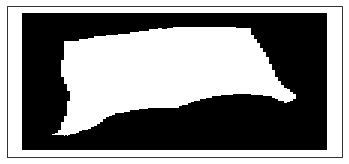

In [5]:
transmogrifyer(mask)

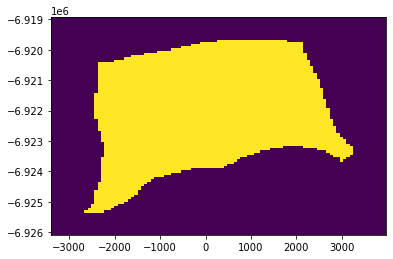

In [6]:
X = mask_data['x'].values.reshape(ny,nx).T
Y = mask_data['y'].values.reshape(ny,nx).T
Z = mask_data['z'].values.reshape(ny,nx).T

plt.pcolormesh(X,Y,Z)
plt.show()

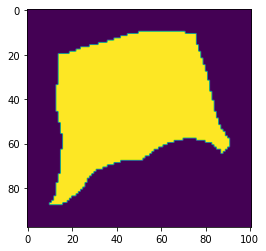

In [7]:
dem_reader = rio.open("/home/sa42/data/glac/RGI_TOPO/extracted_mask_files/RGI60-19.02001_glacier_mask.tif")
r = plt.imshow(dem_reader.read(1))

In [8]:
RGI = pd.read_csv("~/notebooks/glac/RGI/RGI.csv")
RGI


,RGIId,GLIMSId
0,RGI60-19.02000,G300617E62419S
1,RGI60-19.02001,G300548E62430S
2,RGI60-19.02002,G300430E62407S
3,RGI60-19.02003,G300358E62357S
4,RGI60-19.02004,G300038E62455S
...,...,...
216497,RGI60-19.01879,G314559E60660S
216498,RGI60-19.01920,G301226E62159S
216499,RGI60-19.01921,G301215E62199S
216500,RGI60-19.01922,G301280E62193S


In [9]:
with rio.open("/home/sa42/data/glac/RGI_TOPO/extracted_mask_files/RGI60-19.02000_glacier_mask.tif") as dem_src:
    dtm_pre_arr = dem_src.read(1)

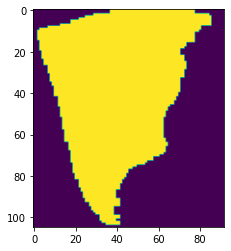

In [10]:
dem_reader = rio.open("/home/sa42/data/glac/RGI_TOPO/extracted_dem_files/MAPZEN/RGI60-19.02000_dem.tif")
r = plt.imshow(dem_reader.read(1))

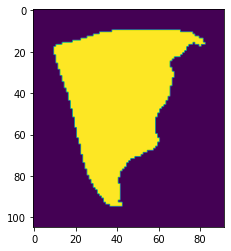

In [11]:
dem_reader = rio.open("/home/sa42/data/glac/RGI_TOPO/extracted_mask_files/RGI60-19.02000_glacier_mask.tif")
r = plt.imshow(dem_reader.read(1))

In [12]:
RGI.iloc[[0]].plot()

TypeError: no numeric data to plot

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(type(world))
world